In [1]:
import pandas as pd 
import numpy as np 
import scipy.stats as st 
from scipy.interpolate import interp1d
from matplotlib import pyplot as plt 
import math
import seaborn as seabornInstance 
import statistics as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.model_selection import train_test_split 

In [2]:
data=pd.read_csv('AR_4_U.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
y=data.iloc[:,0]
x=data.iloc[:,2]
z=data.iloc[:,3]

print(stats.stdev(y))
print(data)

0.01954912493563966
           A         B         C        D
0   0.000012  0.001007  45.32733  0.31478
1   0.000692  0.052067  44.51848  0.07224
2   0.000001  0.000256  44.32612  0.01430
3   0.000006  0.003469  44.69770  0.00526
4   0.000005  0.001249  44.30242  0.01505
..       ...       ...       ...      ...
66  0.000014  0.026826  44.65970  0.01427
67  0.000032  0.004292  44.79900  0.00287
68  0.000053  7.601156  44.18964  0.16066
69  0.000258  0.092009  44.25669  0.01856
70  0.000068  0.045994  44.35819  0.03576

[71 rows x 4 columns]


In [3]:
data.describe()

,A,B,C,D
count,71.000000,71.000000,71.000000,71.000000
mean,0.004846,2.265846,44.587469,0.052505
std,0.019549,6.726612,0.319358,0.057198
min,0.000001,0.000256,44.084260,0.001460
25%,0.000022,0.014749,44.328685,0.014100
50%,0.000072,0.047872,44.549210,0.031930
75%,0.000458,0.133185,44.791910,0.066065
max,0.119858,37.016728,45.679790,0.314780


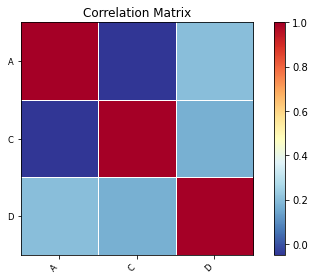

In [4]:
corr = data.set_index('B').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

pendiente b1  -0.0030309535791337204
intercepción b0 is 0.1399889403596712


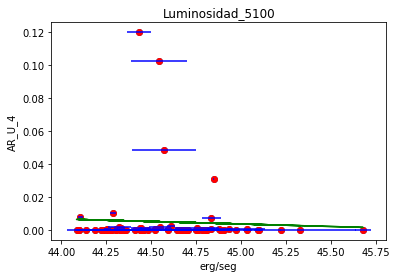

In [5]:
n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('pendiente b1 ', b1)
print('intercepción b0 is', b0)
  
plt.scatter(x,y)
xerror = z
plt.errorbar(x,y,xerr=xerror, fmt = ' ' , ecolor='blue')
plt.title("Luminosidad_5100")

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('erg/seg')
plt.ylabel('AR_U_4')
plt.savefig("Luminosidad_5100_AR_U_4.pdf")

/home/didier/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'erg/seg')

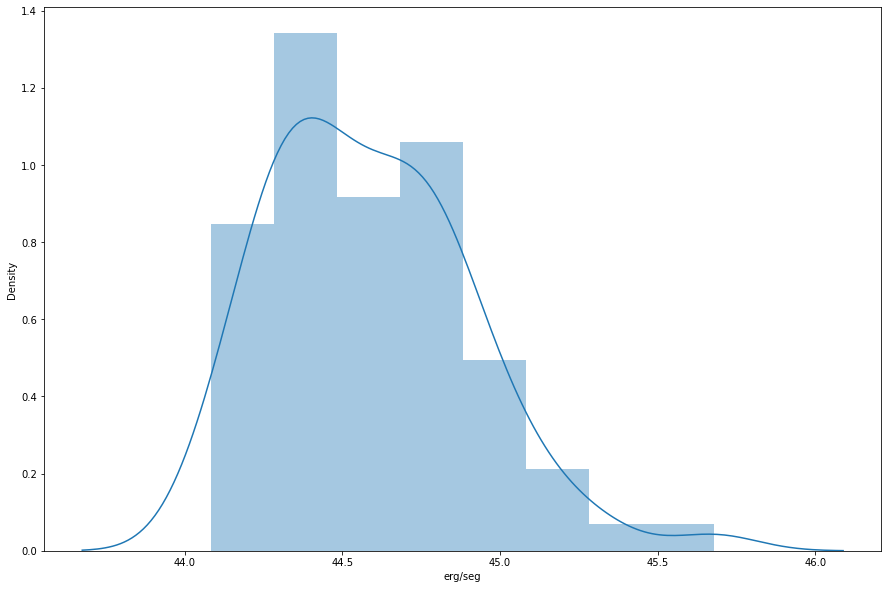

In [6]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(data['C'])
plt.xlabel('erg/seg')

In [7]:
x=np.array(data.iloc[:,2:-1])
y=np.array(data.iloc[:,:-1])
x = x.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
print('Pendiente :' ,regression_model.coef_)
print('Intercepción:', regression_model.intercept_)
print('Errorcuadratico medio :',mse)
print('Raiz del error cuadratico medio: ', rmse)
print(' Coeficiente de determinacion R2 : ', r2)


Pendiente : [[-0.00303095]
 [-0.14637415]
 [ 1.        ]]
Intercepción: [0.13998894 8.79229836 0.        ]
Errorcuadratico medio : 14.869414648491464
Raiz del error cuadratico medio:  3.8560879980222786
 Coeficiente de determinacion R2 :  0.3341666487295892


In [8]:
data=pd.read_csv('AR_4_G.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
y=data.iloc[:,0]
x=data.iloc[:,2]
z=data.iloc[:,3]

print(stats.stdev(y))
print(data)

0.005963578212315401
           A         B         C        D
0   0.006500  0.077690  45.32733  0.31478
1   0.005297  0.065577  44.51848  0.07224
2   0.000028  0.000791  44.32612  0.01430
3   0.000010  0.007980  44.69770  0.00526
4   0.044851  0.112740  44.30242  0.01505
..       ...       ...       ...      ...
65  0.002766  0.084220  44.54921  0.06313
66  0.000162  0.006884  44.65970  0.01427
67  0.000004  0.007210  44.79900  0.00287
68  0.000283  0.033887  44.18964  0.16066
69  0.000022  0.021450  44.25669  0.01856

[70 rows x 4 columns]


In [9]:
data.describe()

,A,B,C,D
count,70.000000,70.000000,70.000000,70.000000
mean,0.002481,0.371874,44.590745,0.052744
std,0.005964,2.025722,0.320460,0.057575
min,0.000002,0.000408,44.084260,0.001460
25%,0.000029,0.008801,44.327403,0.014015
50%,0.000198,0.038397,44.559770,0.029930
75%,0.002497,0.090622,44.795455,0.066477
max,0.044851,15.847845,45.679790,0.314780


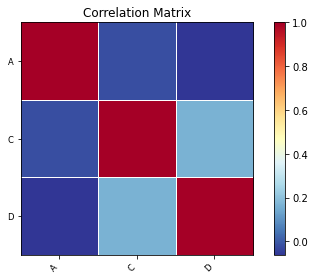

In [10]:
corr = data.set_index('B').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

pendiente b1  -0.00031767690413423674
intercepción b0 is 0.01664634798567876


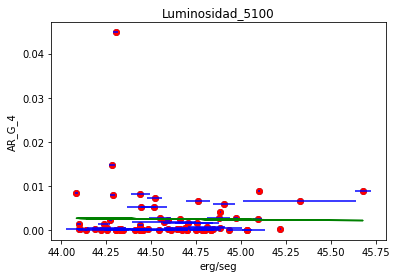

In [11]:
n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('pendiente b1 ', b1)
print('intercepción b0 is', b0)
  
plt.scatter(x,y)
xerror = z
plt.errorbar(x,y,xerr=xerror, fmt = ' ' , ecolor='blue')
plt.title("Luminosidad_5100")

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('erg/seg')
plt.ylabel('AR_G_4')
plt.savefig("Luminosidad_5100_AR_G_4.pdf")

/home/didier/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'erg/seg')

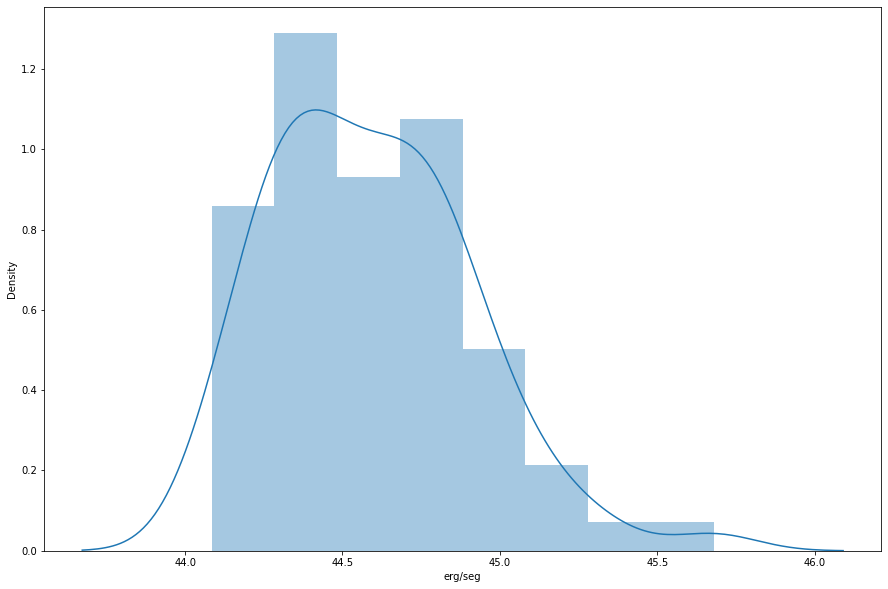

In [12]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(data['C'])
plt.xlabel('erg/seg')

In [13]:
x=np.array(data.iloc[:,2:-1])
y=np.array(data.iloc[:,:-1])
x = x.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
print('Pendiente :' ,regression_model.coef_)
print('Intercepción:', regression_model.intercept_)
print('Errorcuadratico medio :',mse)
print('Raiz del error cuadratico medio: ', rmse)
print(' Coeficiente de determinacion R2 : ', r2)


Pendiente : [[-3.17676904e-04]
 [-1.31659784e+00]
 [ 1.00000000e+00]]
Intercepción: [1.66463480e-02 5.90799519e+01 0.00000000e+00]
Errorcuadratico medio : 1.289830654848396
Raiz del error cuadratico medio:  1.135707116667143
 Coeficiente de determinacion R2 :  0.3478906429569144


In [14]:
data=pd.read_csv('AR_4_R.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
y=data.iloc[:,0]
x=data.iloc[:,2]
z=data.iloc[:,3]

print(stats.stdev(y))
print(data)

0.002659287914535074
               A         B         C        D
0   8.184780e-05  0.016860  45.32733  0.31478
1   2.517600e-03  0.140595  44.51848  0.07224
2   5.962784e-07  0.000256  44.32612  0.01430
3   4.640125e-05  0.021606  44.69770  0.00526
4   2.579781e-06  0.000081  44.30242  0.01505
..           ...       ...       ...      ...
77  2.155908e-03  0.096396  44.17580  0.04911
78  4.213330e-05  0.001382  44.40151  0.00523
79  4.072430e-06  0.008382  44.20654  0.02390
80  1.731605e-03  0.123684  44.59746  0.00671
81  2.453257e-04  0.116036  44.17015  0.06091

[82 rows x 4 columns]


pendiente b1  -0.0013239923231706514
intercepción b0 is 0.0603236861353113


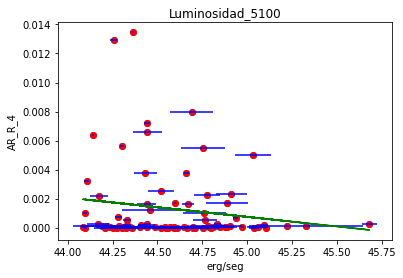

In [9]:
n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('pendiente b1 ', b1)
print('intercepción b0 is', b0)
  
plt.scatter(x,y)
xerror = z
plt.errorbar(x,y,xerr=xerror, fmt = ' ' , ecolor='blue')
plt.title("Luminosidad_5100")

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('erg/seg')
plt.ylabel('AR_R_4')
plt.savefig("Luminosidad_5100_AR_R_4.pdf")

In [10]:
x=np.array(data.iloc[:,2:-1])
y=np.array(data.iloc[:,:-1])
x = x.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
print('Pendiente :' ,regression_model.coef_)
print('Intercepción:', regression_model.intercept_)
print('Errorcuadratico medio :',mse)
print('Raiz del error cuadratico medio: ', rmse)
print(' Coeficiente de determinacion R2 : ', r2)


Pendiente : [[-0.00132399]
 [-1.27069815]
 [ 1.        ]]
Intercepción: [6.03236861e-02 5.72034475e+01 7.10542736e-15]
Errorcuadratico medio : 4.530996023315484
Raiz del error cuadratico medio:  2.1286136388070718
 Coeficiente de determinacion R2 :  0.34547590605551065


In [11]:
data=pd.read_csv('AR_4_I.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
y=data.iloc[:,0]
x=data.iloc[:,2]
z=data.iloc[:,3]

print(stats.stdev(y))
print(data)

0.005804216459660023
           A           B         C        D
0   0.009950    0.101678  45.32733  0.31478
1   0.003414    0.095825  44.51848  0.07224
2   0.000003    0.000623  44.32612  0.01430
3   0.000039    0.013903  44.69770  0.00526
4   0.000500    0.169675  44.30242  0.01505
..       ...         ...       ...      ...
78  0.000045    0.031891  44.40151  0.00523
79  0.000071    0.030658  44.20654  0.02390
80  0.005699    0.197415  44.59746  0.00671
81  0.002052    0.105940  44.17015  0.06091
82  0.016352  249.126867  44.31297  0.01773

[83 rows x 4 columns]


pendiente b1  0.0014137179628536743
intercepción b0 is -0.060567070519351514


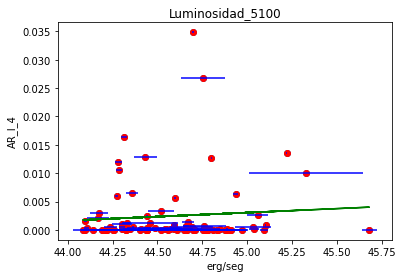

In [12]:
n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('pendiente b1 ', b1)
print('intercepción b0 is', b0)
  
plt.scatter(x,y)
xerror = z
plt.errorbar(x,y,xerr=xerror, fmt = ' ' , ecolor='blue')
plt.title("Luminosidad_5100")

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('erg/seg')
plt.ylabel('AR_I_4')
plt.savefig("Luminosidad_5100_AR_I_4.pdf")

In [13]:
x=np.array(data.iloc[:,2:-1])
y=np.array(data.iloc[:,:-1])
x = x.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
print('Pendiente :' ,regression_model.coef_)
print('Intercepción:', regression_model.intercept_)
print('Errorcuadratico medio :',mse)
print('Raiz del error cuadratico medio: ', rmse)
print(' Coeficiente de determinacion R2 : ', r2)


Pendiente : [[ 0.00141372]
 [-0.89230822]
 [ 1.        ]]
Intercepción: [-6.05670705e-02  4.74142497e+01  7.10542736e-15]
Errorcuadratico medio : 558.9830904987093
Raiz del error cuadratico medio:  23.642823234518954
 Coeficiente de determinacion R2 :  0.33532180797674593


In [14]:
data=pd.read_csv('AR_4_Z.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
y=data.iloc[:,0]
x=data.iloc[:,2]
z=data.iloc[:,3]

print(stats.stdev(y))
print(data)

0.010525575094155115
           A          B         C        D
0   0.000112   0.112212  45.32733  0.31478
1   0.000015   0.027032  44.51848  0.07224
2   0.000006   0.023176  44.32612  0.01430
3   0.000219   1.678436  44.69770  0.00526
4   0.000487   0.403842  44.30242  0.01505
..       ...        ...       ...      ...
75  0.000003   0.019037  44.77507  0.07369
76  0.000001   0.001120  44.36424  0.00708
77  0.000004   0.016871  44.17580  0.04911
78  0.000099   0.132511  44.40151  0.00523
79  0.002389  83.243755  44.20654  0.02390

[80 rows x 4 columns]


pendiente b1  0.004184401184810329
intercepción b0 is -0.1843044052760834


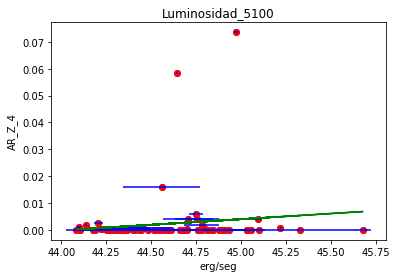

In [16]:
n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('pendiente b1 ', b1)
print('intercepción b0 is', b0)
  
plt.scatter(x,y)
xerror = z
plt.errorbar(x,y,xerr=xerror, fmt = ' ' , ecolor='blue')
plt.title("Luminosidad_5100")

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('erg/seg')
plt.ylabel('AR_Z_4')
plt.savefig("Luminosidad_5100_AR_Z_4.pdf")

In [17]:
x=np.array(data.iloc[:,2:-1])
y=np.array(data.iloc[:,:-1])
x = x.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
print('Pendiente :' ,regression_model.coef_)
print('Intercepción:', regression_model.intercept_)
print('Errorcuadratico medio :',mse)
print('Raiz del error cuadratico medio: ', rmse)
print(' Coeficiente de determinacion R2 : ', r2)


Pendiente : [[4.18440118e-03]
 [5.29357864e+00]
 [1.00000000e+00]]
Intercepción: [-1.84304405e-01 -2.13529481e+02  0.00000000e+00]
Errorcuadratico medio : 2974.2450671084957
Raiz del error cuadratico medio:  54.53663967562079
 Coeficiente de determinacion R2 :  0.338730392966176
